## Importation des packages nécessaires




In [ ]:
import pandas as pd
import numpy as np
import os
import re 
import fitz # pour installer le package associé "pip install PyMupdf"
import PyPDF2 # pour la lecture de pdf
import warnings 
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Fichiers Excel contenant les clauses du médiateur et des clauses générées 

In [308]:
print(os.getcwd())

w:\DIR AUDIT\01.Click&Share\02.Knowledge\09.Data\12. POLE DATA DAA\TRAVAUX DIMITRI\01. INTERPRETABILITE CLAUSES\travaux_clauses


In [ ]:
df_mediateur_clauses_exclues= pd.read_excel(r"W:\DIR AUDIT\01.Click&Share\02.Knowledge\09.Data\12. POLE DATA DAA\TRAVAUX DIMITRI\01. INTERPRETABILITE CLAUSES\travaux_clauses\clauses_mediateur.xls")
df_clauses_inter_1 = pd.read_excel(r"W:\DIR AUDIT\01.Click&Share\02.Knowledge\09.Data\12. POLE DATA DAA\TRAVAUX DIMITRI\01. INTERPRETABILITE CLAUSES\travaux_clauses\clauses_contractuelles_inter_1.xls")
df_clauses_non_inter_0 = pd.read_excel(r"W:\DIR AUDIT\01.Click&Share\02.Knowledge\09.Data\12. POLE DATA DAA\TRAVAUX DIMITRI\01. INTERPRETABILITE CLAUSES\travaux_clauses\clauses_contractuelles_non_inter_0.xls")                        

In [310]:
df_mediateur_clauses_exclues.rename(columns ={'Unnamed: 0':'clauses'}, inplace=True) # pour renommer la colonne "unnamed" en "clauses"

warnings.filterwarnings("ignore")  # Pour éviter l'affichage de warnings trop longs

n = df_mediateur_clauses_exclues.shape[0]
df_mediateur_clauses_exclues["interpretabilite"] = None
for i in range(n+1):
    df_mediateur_clauses_exclues["interpretabilite"][i] = 1  # attribution d'un label d'interprétabilité aux clauses

In [311]:
df_mediateur_clauses_exclues.head(10)

,clauses,interpretabilite
0,Les dommages résultant d’un défaut permanent e...,1
1,Les dommages résultant d’un manque de réparati...,1
2,Les dommages résultant d’une usure normale. Le...,1
3,Les dépenses résultant d’une usure normale.,1
4,Les dommages résultant d’une vétusté.,1
5,Les pertes résultant d’une vétusté.,1
6,Les dépenses résultant d’une vétusté. Les domm...,1
7,Les pertes résultant défaut d’entretien. Les d...,1
8,Les dommages résultant d’une insuffisance d’en...,1
9,Les pertes résultant d’une insuffisance d’entr...,1


In [ ]:
df_clauses_inter_1.rename(columns ={'Unnamed: 0':'clauses'}, inplace=True)
df_clauses_inter_1 = df_clauses_inter_1.dropna()

df_clauses_inter_1.to_string()

df_clauses_inter_1 = df_clauses_inter_1.reset_index(drop=True)
warnings.filterwarnings("ignore")

n = df_clauses_inter_1.shape[0]
df_clauses_inter_1["interpretabilite"] = None
for i in range(n+1):
    df_clauses_inter_1["interpretabilite"][i] = 1  # attribution d'un label d'interprétabilité aux clauses 

In [313]:
df_clauses_inter_1.head(10)

,clauses,interpretabilite
0,"""Les dommages causés par un usage excessif des...",1
1,"""Les pertes liées à une usure prématurée des é...",1
2,"""Les dommages causés par un usage contraire au...",1
3,"""Les sinistres découlant d'une exposition prol...",1
4,"""Les dégâts provoqués par une surcharge électr...",1
5,"""Les pertes occasionnées par des réparations n...",1
6,"""Les dommages causés par la négligence dans l’...",1
7,"""Les sinistres survenus dans des zones non aut...",1
8,"""Les dommages causés par des travaux de bricol...",1
9,"""Les pertes causées par une installation tempo...",1


In [314]:
df_clauses_non_inter_0.rename(columns ={'Unnamed: 0':'clauses'}, inplace=True)

warnings.filterwarnings("ignore")
n = df_clauses_non_inter_0.shape[0]
df_clauses_non_inter_0["interpretabilite"] = None
for i in range(n+1):
    df_clauses_non_inter_0["interpretabilite"][i] = 0   # attribution d'un label d'interprétabilité aux clauses 

In [315]:
df_clauses_non_inter_0.head(10)

,clauses,interpretabilite
0,"""Les dommages causés par un incendie déclenché...",0
1,"""Les pertes résultant d'une utilisation des bi...",0
2,"""Les sinistres causés par des actes criminels ...",0
3,"""Les dommages résultant de la participation de...",0
4,"""Les pertes subies en raison d'un défaut d'ent...",0
5,"""Les sinistres liés à des actes de guerre, d’i...",0
6,"""Les sinistres causés par des matériaux non co...",0
7,"""Les dommages causés par l’usure normale des b...",0
8,"""Les pertes résultant d’une tentative fraudule...",0
9,"""Les sinistres causés par un vol survenu lorsq...",0


In [316]:
print(df_mediateur_clauses_exclues.shape,"\n", df_clauses_inter_1.shape,"\n", df_clauses_non_inter_0.shape)

(21, 2) 
 (90, 2) 
 (100, 2)


#### Concaténation des différentes bases en une seule

In [317]:
df_clauses_mediateur = pd.concat([df_mediateur_clauses_exclues, df_clauses_inter_1, df_clauses_non_inter_0], ignore_index=True)
print(df_clauses_mediateur.to_string(), "\n",
       "  " , df_clauses_mediateur.shape)


                                                                                                                                                                                 clauses interpretabilite
0                                                                                                                Les dommages résultant d’un défaut permanent et volontaire d’entretien.                1
1                                                                                                Les dommages résultant d’un manque de réparations indispensables incombant à l’assuré.                 1
2                                                                                                 Les dommages résultant d’une usure normale. Les pertes résultant d’une usure normale.                 1
3                                                                                                                                           Les dépenses résultant d’une usure normale.         

In [318]:
df_clauses_mediateur = df_clauses_mediateur.dropna()

In [319]:
pd.value_counts(df_clauses_mediateur["interpretabilite"])

interpretabilite
1    111
0    100
Name: count, dtype: int64

##### La base finale obtenue contient 211 clauses dont 111 qui sont interprétables et 100 ne le sont pas (dont pas de déséquilibre de classe à priori)

## Fichiers pdf de contrats d'assurance non-vie de PCK contenant des clauses (non labellisées) 

In [320]:
contrat_MRH = "W:\\DIR AUDIT\\01.Click&Share\\02.Knowledge\\09.Data\\12. POLE DATA DAA\\TRAVAUX DIMITRI\\01. INTERPRETABILITE CLAUSES\\travaux_clauses\\fichiers_utiles\\7047B.39_NIP_NH_JUIN_2024.pdf"
contrat_automoteurs ="W:\\DIR AUDIT\\01.Click&Share\\02.Knowledge\\09.Data\\12. POLE DATA DAA\\TRAVAUX DIMITRI\\01. INTERPRETABILITE CLAUSES\\travaux_clauses\\fichiers_utiles\\7102M.39_NIP_Automoteurs_JUIN_2024.pdf"
contrat_multirisque_pro = "W:\\DIR AUDIT\\01.Click&Share\\02.Knowledge\\09.Data\\12. POLE DATA DAA\\TRAVAUX DIMITRI\\01. INTERPRETABILITE CLAUSES\\travaux_clauses\\fichiers_utiles\\7195A.39_NIP_M9_Pro_DEC_2023.pdf"

#### Fonction pour extraire le contenu des encadrés contenant les exclusions (clauses)

In [321]:
def extract_text_from_boxes(pdf_path, margin=30):
    contrat = fitz.open(pdf_path)  # ouvrir le pdf 
    specific_boxes = []

    keywords = [
        "Ce que nous ne garantissons pas",
        "Les exclusions générales",
        "l’article L 211-1",
        "exlusions particulières",
        "Ce que nous ne prenons jamais en charge",
        "articles L 1331-22",
        "• Les exclusions générales figurant page 9."   # mots clés pour répérer le contenu à extraire
    ]

    for page_num in range(len(contrat)):
        page = contrat[page_num]

        blocks = page.get_text("dict")["blocks"]
        for block in blocks:
            rect = block["bbox"]
            
            # Vérifier si la clé 'lines' existe dans le dictionnaire
            if 'lines' in block:
                text = block["lines"]
                
                block_text = ""
                for line in text:
                    for span in line["spans"]:
                        block_text += span["text"] + " "

                if any(keyword in block_text for keyword in keywords):
                    # Agrandir le rectangle en ajoutant une marge de 30 points
                    enlarged_rect = [
                        rect[0] - margin,  # gauche
                        rect[1] - margin,  # haut
                        rect[2] + margin,  # droite
                        rect[3] + margin   # bas
                    ]
                    specific_boxes.append({
                        "page": page_num + 1,
                        "rectangle": enlarged_rect,
                        "text": block_text.strip()
                    })

    return specific_boxes

In [322]:
result_MRH = extract_text_from_boxes(contrat_MRH)
result_multirisque_pro = extract_text_from_boxes(contrat_multirisque_pro)
result_automoteurs = extract_text_from_boxes(contrat_automoteurs)

#### Fonction pour transformer le contenu textuel de chaque contrat d'assurance en liste


In [323]:
def transformation_liste(result_contrat):
    split_elements = []
    clauses = []

    for element in result_contrat:
        split_elements.append(element["text"].split("•\t"))
    for clause in split_elements:
        for texte in clause:
            clauses.append(texte.strip())  

    return clauses


In [324]:
liste_exclusions_MRH = transformation_liste(result_MRH)
liste_exclusions_A4 = transformation_liste(result_automoteurs)
liste_exclusions_MRP = transformation_liste(result_multirisque_pro)

#### Fonction pour séparer les différentes clauses des contrats de PCK

In [ ]:
def segmentation_exclusions(liste_exclusions):
    clauses_formatted = []
    
    for clause in liste_exclusions:
        clause = clause.strip()
        if ":" in clause:
            base, *subparts = clause.split(":")
            base = base.strip()
            for subpart in subparts:
                # Utiliser re pour trouver les occurrences de ' - ' (tiret entouré d'espaces)
                subpart_lines = re.split(r'\s*-\s*', subpart)
                for line in subpart_lines:
                    if line.strip():  # Vérifier que la ligne n'est pas vide
                        clauses_formatted.append(f"{base} {line.strip()}")
        else:
            clauses_formatted.append(clause)

    return clauses_formatted


In [326]:
liste_exclusions_MRH = segmentation_exclusions(liste_exclusions_MRH)
liste_exclusions_A4 = segmentation_exclusions(liste_exclusions_A4)
liste_exclusions_MRP = segmentation_exclusions(liste_exclusions_MRP)

In [327]:
import warnings
warnings.filterwarnings("ignore")
df_exclusions_MRH = pd.DataFrame({'clauses': liste_exclusions_MRH})

# Création de la variable qui donne le type de contrat

n = df_exclusions_MRH.shape[0]
df_exclusions_MRH["code_contrat"]=None
for i in range(n+1):
    df_exclusions_MRH["code_contrat"][i] = "MRH"

In [328]:
df_exclusions_MRH.head(10)

,clauses,code_contrat
0,● -- \t Ce que nous ne garantissons pas,MRH
1,"Les exploitations agricoles,",MRH
2,"Tout risque à usage professionnel ou commercial,",MRH
3,Les bâtiments inoccupés en permanence depuis ...,MRH
4,Les dépendances situées dans une autre commu...,MRH
5,Les biens mobiliers utilisés pour l’exercice ...,MRH
6,,MRH
7,Les aménagements et installations extérieurs ...,MRH
8,"Les vélos, le matériel de sport et de loisir ...",MRH
9,Les canalisations d’alimentation et d’évacuat...,MRH


In [329]:
warnings.filterwarnings("ignore")
df_exclusions_A4 = pd.DataFrame({'clauses': liste_exclusions_A4})

# Création de la variable qui donne le type de contrat

n = df_exclusions_A4.shape[0]
df_exclusions_A4["code_contrat"]=None
for i in range(n+1):
    df_exclusions_A4["code_contrat"][i] = "A4"

In [330]:
df_exclusions_A4.head(10)

,clauses,code_contrat
0,● ---- \t Ce que nous ne garantissons pas,A4
1,- Les exclusions générales page 5.,A4
2,● -- \t Ce que nous ne garantissons pas,A4
3,Les conséquences pécuniaires de votre faute ...,A4
4,● ---- \t Ce que nous ne garantissons pas,A4
5,Les atteintes à l’environnement imputables à ...,A4
6,Ce que nous ne garantissons pas,A4
7,Les dommages subis par l’automoteur assuré.,A4
8,"Les dommages subis par les marchandises, obj...",A4
9,Les conséquences pécuniaires de votre respon...,A4


In [331]:
liste_exclusions_MRP = segmentation_exclusions(liste_exclusions_MRP)

In [332]:
warnings.filterwarnings("ignore")

df_exclusions_MRP = pd.DataFrame({'clauses': liste_exclusions_MRP})

# Création de la variable qui donne le type de contrat

n = df_exclusions_MRP.shape[0]
df_exclusions_MRP["code_contrat"]=None
for i in range(n+1):
    df_exclusions_MRP["code_contrat"][i] = "MRP"

In [333]:
df_exclusions_MRP.head(10)

,clauses,code_contrat
0,ou finis destinés à être transformés ou vendus...,MRP
1,"les approvisionnements,",MRP
2,"les équipements des piscines (matériel, y com...",MRP
3,"les plantations,",MRP
4,vos biens et effets vestimentaires personnels...,MRP
5,les espèces définies dans les mots clés figur...,MRP
6,"les archives, y compris toutes informations s...",MRP
7,Les terrains et les cultures.,MRP
8,Les bâtiments inoccupés en permanence depuis ...,MRP
9,Les édifices menaçants ruines c’est-à-dire qu...,MRP


In [334]:
# Concaténation des bases de données MRH, A4 et MRP (superposition des lignes)

df_exclusions_pck = pd.concat([df_exclusions_MRH, df_exclusions_A4, df_exclusions_MRP], ignore_index=True)
df_exclusions_pck

,clauses,code_contrat
0,● -- \t Ce que nous ne garantissons pas,MRH
1,"Les exploitations agricoles,",MRH
2,"Tout risque à usage professionnel ou commercial,",MRH
3,Les bâtiments inoccupés en permanence depuis ...,MRH
4,Les dépendances situées dans une autre commu...,MRH
...,...,...
497,de votre responsabilité civile résultant du ...,MRP
498,Les conséquences pécuniaires de votre respon-...,MRP
499,Lorsque le souscripteur est une personne phy...,MRP
500,"Lorsque le souscripteur est un groupement, le...",MRP


In [335]:
# Suppression de certaines clauses inutiles du dataframe

texts_to_remove = ["Ce que nous ne garantissons pas", "les exclusions générales figurant page 9","les exclusions générales page 5","les exclusions générales figurant pages 11 et 12 "]
df_exclusions_pck = df_exclusions_pck[~df_exclusions_pck['clauses'].str.contains('|'.join(texts_to_remove), case=False)]

In [336]:
df_exclusions_pck["clauses"].isnull().sum()

0

In [337]:
df_exclusions_pck.tail()

,clauses,code_contrat
497,de votre responsabilité civile résultant du ...,MRP
498,Les conséquences pécuniaires de votre respon-...,MRP
499,Lorsque le souscripteur est une personne phy...,MRP
500,"Lorsque le souscripteur est un groupement, le...",MRP
501,Toutes condamnations pécuniaires infligées à...,MRP


## Machine Learning 

#### Preprocessing de dataframe du médiateur

In [339]:
# Prétraitement des données (utilisez votre fonction de prétraitement existante si nécessaire)
stop_words = stopwords.words('french')
lemmatizer = WordNetLemmatizer()

def data_preprocessing(text):
    text = re.sub(re.compile('<.*?>'), '', text) # Suppression des tags HTML
    text = re.sub(r'\W', ' ', text)  
    text = text.lower() # Conversion en minuscules
    tokens = nltk.word_tokenize(text) # Tokenisation du texte en mots
    text = [word for word in tokens if word not in stop_words] # Suppression des STOP WORDS
    text = [lemmatizer.lemmatize(word) for word in text] # Lemmatisation des mots
    text = ' '.join(text) # Reconstitution du texte à partir des mots
    return text

In [340]:
df_exclusions_pck['clauses_clean'] = df_exclusions_pck['clauses'].apply(lambda text: data_preprocessing(text))

In [341]:
df_exclusions_pck['clauses_clean']

1                                 exploitation agricoles
2             tout risque usage professionnel commercial
3      bâtiments inoccupés permanence depuis plus 10 ...
4      dépendances situées autre commune bâtiment hab...
5      biens mobiliers utilisés exercice profession d...
                             ...                        
497    responsabilité civile résultant non respect di...
498    conséquences pécuniaires respon sabilité civil...
499    lorsque souscripteur personne physique conséqu...
500    lorsque souscripteur groupement conséquences p...
501    toutes condamnations pécuniaires infligées tit...
Name: clauses_clean, Length: 385, dtype: object

#### Vectorisation du texte

In [343]:
sentences = df_exclusions_pck["clauses_clean"].tolist() 

In [344]:
# Modèle de vectorisation avec Word2vec

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [345]:
# Création d'une fonction pour vectoriser les clauses avec word2vec

def vectorize_text(text):
    word_vectors = [model.wv[word] for word in text if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

In [346]:
df_exclusions_pck["clauses_clean_vectorized"] = df_exclusions_pck["clauses_clean"].apply(vectorize_text)
df_exclusions_pck["clauses_clean_vectorized"]

1      [-0.039642476, 0.19898146, 0.060496464, 0.1239...
2      [-0.038744196, 0.19975212, 0.060455732, 0.1262...
3      [-0.039236348, 0.19486606, 0.061086807, 0.1227...
4      [-0.03978732, 0.19322017, 0.059465446, 0.12267...
5      [-0.03986014, 0.19515386, 0.06125391, 0.123846...
                             ...                        
497    [-0.050121866, 0.19327644, 0.071168885, 0.1269...
498    [-0.03692505, 0.1974899, 0.0604238, 0.12445564...
499    [-0.037094917, 0.19830242, 0.060152464, 0.1249...
500    [-0.037436064, 0.19801705, 0.060004618, 0.1245...
501    [-0.037850376, 0.19804725, 0.05967903, 0.12354...
Name: clauses_clean_vectorized, Length: 385, dtype: object

In [347]:
# Affichage d'un vecteur du dataframe
 
n = np.random.randint(len(df_exclusions_pck["clauses_clean_vectorized"]))
print("vectorisation de la ligne", n, ":")
df_exclusions_pck["clauses_clean_vectorized"][n]

vectorisation de la ligne 102 :


array([-0.03869124,  0.19806139,  0.06007064,  0.12534392, -0.02050911,
       -0.11752318,  0.16389982,  0.31551257, -0.19810943, -0.32379124,
        0.05710691, -0.14623903,  0.01954183, -0.01481757,  0.10777393,
        0.0334705 ,  0.279019  ,  0.02970582, -0.11906568, -0.4361175 ,
       -0.00268168,  0.00312433,  0.21595018, -0.01280166, -0.0962256 ,
        0.17305155, -0.1647321 ,  0.06210361, -0.05742517,  0.17859961,
        0.17576233, -0.14247125,  0.06083034, -0.25468716, -0.05895201,
        0.13499625,  0.07988787,  0.03039124, -0.14431429,  0.01444469,
        0.15626174, -0.1057905 , -0.15170527,  0.21476954,  0.09973003,
       -0.13856795, -0.07526328, -0.13793045,  0.05130341,  0.0319545 ,
        0.02497202, -0.15102196, -0.14305559, -0.11390133, -0.11508489,
        0.01863921,  0.00215009, -0.11913521,  0.03963903,  0.03531584,
       -0.0704916 , -0.13031097,  0.3529944 ,  0.11619648, -0.11101237,
        0.30798534, -0.0004732 ,  0.18425554, -0.24150951, -0.07

In [348]:
df_exclusions_pck

,clauses,code_contrat,clauses_clean,clauses_clean_vectorized
1,"Les exploitations agricoles,",MRH,exploitation agricoles,"[-0.039642476, 0.19898146, 0.060496464, 0.1239..."
2,"Tout risque à usage professionnel ou commercial,",MRH,tout risque usage professionnel commercial,"[-0.038744196, 0.19975212, 0.060455732, 0.1262..."
3,Les bâtiments inoccupés en permanence depuis ...,MRH,bâtiments inoccupés permanence depuis plus 10 ...,"[-0.039236348, 0.19486606, 0.061086807, 0.1227..."
4,Les dépendances situées dans une autre commu...,MRH,dépendances situées autre commune bâtiment hab...,"[-0.03978732, 0.19322017, 0.059465446, 0.12267..."
5,Les biens mobiliers utilisés pour l’exercice ...,MRH,biens mobiliers utilisés exercice profession d...,"[-0.03986014, 0.19515386, 0.06125391, 0.123846..."
...,...,...,...,...
497,de votre responsabilité civile résultant du ...,MRP,responsabilité civile résultant non respect di...,"[-0.050121866, 0.19327644, 0.071168885, 0.1269..."
498,Les conséquences pécuniaires de votre respon-...,MRP,conséquences pécuniaires respon sabilité civil...,"[-0.03692505, 0.1974899, 0.0604238, 0.12445564..."
499,Lorsque le souscripteur est une personne phy...,MRP,lorsque souscripteur personne physique conséqu...,"[-0.037094917, 0.19830242, 0.060152464, 0.1249..."
500,"Lorsque le souscripteur est un groupement, le...",MRP,lorsque souscripteur groupement conséquences p...,"[-0.037436064, 0.19801705, 0.060004618, 0.1245..."


##### Prétraitement et vectorisation des clauses du médiateur

In [349]:
df_clauses_mediateur

,clauses,interpretabilite
0,Les dommages résultant d’un défaut permanent e...,1
1,Les dommages résultant d’un manque de réparati...,1
2,Les dommages résultant d’une usure normale. Le...,1
3,Les dépenses résultant d’une usure normale.,1
4,Les dommages résultant d’une vétusté.,1
...,...,...
206,"""Les sinistres résultant de l’exportation illé...",0
207,"""Les dommages causés par des fuites d’eau prov...",0
208,"""Les pertes liées à des équipements assurés st...",0
209,"""Les sinistres causés par des marchandises tra...",0


In [350]:
# prétraitement 

df_clauses_mediateur['clauses_clean'] = df_clauses_mediateur['clauses'].apply(lambda text: data_preprocessing(text))

In [351]:
# Vectorisation du dataframe des clauses du médiateur 

df_clauses_mediateur["clauses_clean_vectorized"] = df_clauses_mediateur['clauses_clean'].apply(vectorize_text)
df_clauses_mediateur

,clauses,interpretabilite,clauses_clean,clauses_clean_vectorized
0,Les dommages résultant d’un défaut permanent e...,1,dommages résultant défaut permanent volontaire...,"[-0.03852892, 0.19605191, 0.059620474, 0.12333..."
1,Les dommages résultant d’un manque de réparati...,1,dommages résultant manque réparations indispen...,"[-0.037575036, 0.19523259, 0.05870183, 0.12257..."
2,Les dommages résultant d’une usure normale. Le...,1,dommages résultant usure normale pertes résult...,"[-0.037912596, 0.19700357, 0.05977126, 0.12598..."
3,Les dépenses résultant d’une usure normale.,1,dépenses résultant usure normale,"[-0.03616935, 0.19636945, 0.059732184, 0.12506..."
4,Les dommages résultant d’une vétusté.,1,dommages résultant vétusté,"[-0.038974516, 0.19406047, 0.058945037, 0.1216..."
...,...,...,...,...
206,"""Les sinistres résultant de l’exportation illé...",0,sinistres résultant exportation illégale biens...,"[-0.036403116, 0.1970648, 0.059140507, 0.12433..."
207,"""Les dommages causés par des fuites d’eau prov...",0,dommages causés fuites eau provenant tuyaux no...,"[-0.038734715, 0.19515271, 0.05899876, 0.12438..."
208,"""Les pertes liées à des équipements assurés st...",0,pertes liées équipements assurés stockés lieux...,"[-0.036186416, 0.1958035, 0.060172424, 0.12419..."
209,"""Les sinistres causés par des marchandises tra...",0,sinistres causés marchandises transportées san...,"[-0.035588775, 0.1984274, 0.05856841, 0.123116..."


In [352]:
# Affichage d'un vecteur du dataframe des clauses du médiateur 
 
n = np.random.randint(len(df_clauses_mediateur["clauses_clean_vectorized"]))
print("vectorisation de la ligne", n, ":")
df_clauses_mediateur["clauses_clean_vectorized"][n]

vectorisation de la ligne 179 :


array([-0.03656378,  0.19599453,  0.05863053,  0.12361888, -0.02013827,
       -0.11503875,  0.16329636,  0.31317258, -0.19620426, -0.32111648,
        0.05710455, -0.1443167 ,  0.02127613, -0.01503524,  0.10706788,
        0.03080251,  0.27651381,  0.03013932, -0.11844132, -0.43198857,
       -0.00449576,  0.00172144,  0.21284905, -0.01141895, -0.09591556,
        0.17012352, -0.16216116,  0.06136365, -0.05715985,  0.17711924,
        0.17370516, -0.1415751 ,  0.05916704, -0.25186273, -0.05946688,
        0.13437444,  0.07852635,  0.02961599, -0.14292164,  0.0133464 ,
        0.15475999, -0.10448654, -0.1499545 ,  0.2134131 ,  0.09853475,
       -0.1375903 , -0.07448508, -0.13707218,  0.04953868,  0.03146906,
        0.02496413, -0.15061805, -0.14273307, -0.11412144, -0.11507978,
        0.01731066,  0.00097098, -0.11920869,  0.03884076,  0.03283678,
       -0.06939823, -0.1296958 ,  0.35169423,  0.11423233, -0.11170239,
        0.30644396, -0.00053408,  0.18245271, -0.24142861, -0.07

#### Concaténation entre les bases du médiateur et de PCK

#### Les contrats de PACIFA sont soumis à des contrôles pointilleux de sorte à être alignés avec les recommandations des instances de régulations ( ACPR, le médiateur de l'assurance). C'est ainsi que toutes les clauses extraites des contrats de PCK seront labelisées comme "non interprétables" donc "0"

In [353]:
# Concaténation des bases de données MRH, A4 et MRP (superposition des lignes)

df_exclusions_totales = pd.concat([df_clauses_mediateur, df_exclusions_pck], ignore_index=True)
df_exclusions_totales


,clauses,interpretabilite,clauses_clean,clauses_clean_vectorized,code_contrat
0,Les dommages résultant d’un défaut permanent e...,1,dommages résultant défaut permanent volontaire...,"[-0.03852892, 0.19605191, 0.059620474, 0.12333...",NaN
1,Les dommages résultant d’un manque de réparati...,1,dommages résultant manque réparations indispen...,"[-0.037575036, 0.19523259, 0.05870183, 0.12257...",NaN
2,Les dommages résultant d’une usure normale. Le...,1,dommages résultant usure normale pertes résult...,"[-0.037912596, 0.19700357, 0.05977126, 0.12598...",NaN
3,Les dépenses résultant d’une usure normale.,1,dépenses résultant usure normale,"[-0.03616935, 0.19636945, 0.059732184, 0.12506...",NaN
4,Les dommages résultant d’une vétusté.,1,dommages résultant vétusté,"[-0.038974516, 0.19406047, 0.058945037, 0.1216...",NaN
...,...,...,...,...,...
591,de votre responsabilité civile résultant du ...,NaN,responsabilité civile résultant non respect di...,"[-0.050121866, 0.19327644, 0.071168885, 0.1269...",MRP
592,Les conséquences pécuniaires de votre respon-...,NaN,conséquences pécuniaires respon sabilité civil...,"[-0.03692505, 0.1974899, 0.0604238, 0.12445564...",MRP
593,Lorsque le souscripteur est une personne phy...,NaN,lorsque souscripteur personne physique conséqu...,"[-0.037094917, 0.19830242, 0.060152464, 0.1249...",MRP
594,"Lorsque le souscripteur est un groupement, le...",NaN,lorsque souscripteur groupement conséquences p...,"[-0.037436064, 0.19801705, 0.060004618, 0.1245...",MRP


In [354]:
for i in range(len(df_exclusions_totales)):
    if pd.isna(df_exclusions_totales.loc[i, "interpretabilite"]):
        df_exclusions_totales.loc[i, "interpretabilite"] = 0

In [355]:
df_exclusions_totales

,clauses,interpretabilite,clauses_clean,clauses_clean_vectorized,code_contrat
0,Les dommages résultant d’un défaut permanent e...,1,dommages résultant défaut permanent volontaire...,"[-0.03852892, 0.19605191, 0.059620474, 0.12333...",NaN
1,Les dommages résultant d’un manque de réparati...,1,dommages résultant manque réparations indispen...,"[-0.037575036, 0.19523259, 0.05870183, 0.12257...",NaN
2,Les dommages résultant d’une usure normale. Le...,1,dommages résultant usure normale pertes résult...,"[-0.037912596, 0.19700357, 0.05977126, 0.12598...",NaN
3,Les dépenses résultant d’une usure normale.,1,dépenses résultant usure normale,"[-0.03616935, 0.19636945, 0.059732184, 0.12506...",NaN
4,Les dommages résultant d’une vétusté.,1,dommages résultant vétusté,"[-0.038974516, 0.19406047, 0.058945037, 0.1216...",NaN
...,...,...,...,...,...
591,de votre responsabilité civile résultant du ...,0,responsabilité civile résultant non respect di...,"[-0.050121866, 0.19327644, 0.071168885, 0.1269...",MRP
592,Les conséquences pécuniaires de votre respon-...,0,conséquences pécuniaires respon sabilité civil...,"[-0.03692505, 0.1974899, 0.0604238, 0.12445564...",MRP
593,Lorsque le souscripteur est une personne phy...,0,lorsque souscripteur personne physique conséqu...,"[-0.037094917, 0.19830242, 0.060152464, 0.1249...",MRP
594,"Lorsque le souscripteur est un groupement, le...",0,lorsque souscripteur groupement conséquences p...,"[-0.037436064, 0.19801705, 0.060004618, 0.1245...",MRP


In [356]:
df_exclusions_totales

,clauses,interpretabilite,clauses_clean,clauses_clean_vectorized,code_contrat
0,Les dommages résultant d’un défaut permanent e...,1,dommages résultant défaut permanent volontaire...,"[-0.03852892, 0.19605191, 0.059620474, 0.12333...",NaN
1,Les dommages résultant d’un manque de réparati...,1,dommages résultant manque réparations indispen...,"[-0.037575036, 0.19523259, 0.05870183, 0.12257...",NaN
2,Les dommages résultant d’une usure normale. Le...,1,dommages résultant usure normale pertes résult...,"[-0.037912596, 0.19700357, 0.05977126, 0.12598...",NaN
3,Les dépenses résultant d’une usure normale.,1,dépenses résultant usure normale,"[-0.03616935, 0.19636945, 0.059732184, 0.12506...",NaN
4,Les dommages résultant d’une vétusté.,1,dommages résultant vétusté,"[-0.038974516, 0.19406047, 0.058945037, 0.1216...",NaN
...,...,...,...,...,...
591,de votre responsabilité civile résultant du ...,0,responsabilité civile résultant non respect di...,"[-0.050121866, 0.19327644, 0.071168885, 0.1269...",MRP
592,Les conséquences pécuniaires de votre respon-...,0,conséquences pécuniaires respon sabilité civil...,"[-0.03692505, 0.1974899, 0.0604238, 0.12445564...",MRP
593,Lorsque le souscripteur est une personne phy...,0,lorsque souscripteur personne physique conséqu...,"[-0.037094917, 0.19830242, 0.060152464, 0.1249...",MRP
594,"Lorsque le souscripteur est un groupement, le...",0,lorsque souscripteur groupement conséquences p...,"[-0.037436064, 0.19801705, 0.060004618, 0.1245...",MRP


In [357]:
df_exclusions_totales["interpretabilite"].value_counts(normalize=True)

interpretabilite
0   0.81
1   0.19
Name: proportion, dtype: float64

#### Random Forest

In [358]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,  classification_report
import matplotlib.pyplot as plt

In [359]:
# Définition des variables explicatives et de la variable cible

X = np.array(df_exclusions_totales["clauses_clean_vectorized"].tolist())  # prédicteurs
y = df_exclusions_totales["interpretabilite"].astype(int)  # cible

In [360]:
#  Constitution du jeu d'entrainement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=40)  # 80% pour l'entraînement et 20% pour le test 


In [361]:
# Création et entrainement du modèle Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [362]:
# Prédictions sur l'ensemble test 

y_pred = rf_model.predict(X_test)

In [363]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.8083333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89        97
           1       0.50      0.09      0.15        23

    accuracy                           0.81       120
   macro avg       0.66      0.53      0.52       120
weighted avg       0.76      0.81      0.75       120



#### SMOTE

In [371]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Définition des variables explicatives et de la variable cible
X = np.array(df_exclusions_totales["clauses_clean_vectorized"].tolist())  # prédicteurs
y = df_exclusions_totales["interpretabilite"].astype(int)  # cible

# Constitution du jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)  # 80% pour l'entraînement et 20% pour le test

# Appliquer SMOTE pour suréchantillonner la classe minoritaire
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Création et entraînement du modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Prédictions sur l'ensemble test
y_pred = rf_model.predict(X_test)

# Affichage des résultats
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Affichage de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

ModuleNotFoundError: No module named 'imblearn'

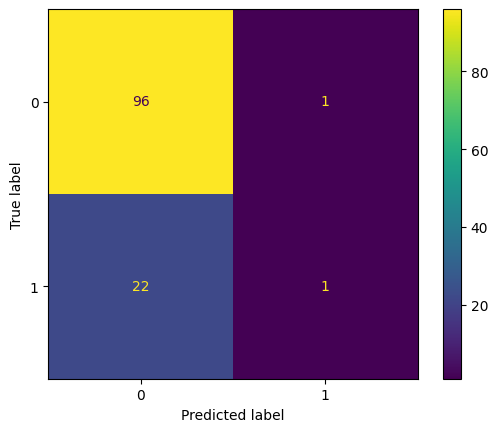

In [ ]:
# Génération de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
# Performance du random forest sur l'ensemble d'entraînement

y_train_pred = rf_model.predict(X_train)

# Calcul de l'accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy sur le jeu d'entraînement: {accuracy}")

# Rapport de classification
report = classification_report(y_train, y_train_pred)
print("Classification sur le jeu d'entraînement:")
print(report)


Accuracy sur le jeu d'entraînement: 1.0
Classification sur le jeu d'entraînement:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       388
           1       1.00      1.00      1.00        88

    accuracy                           1.00       476
   macro avg       1.00      1.00      1.00       476
weighted avg       1.00      1.00      1.00       476



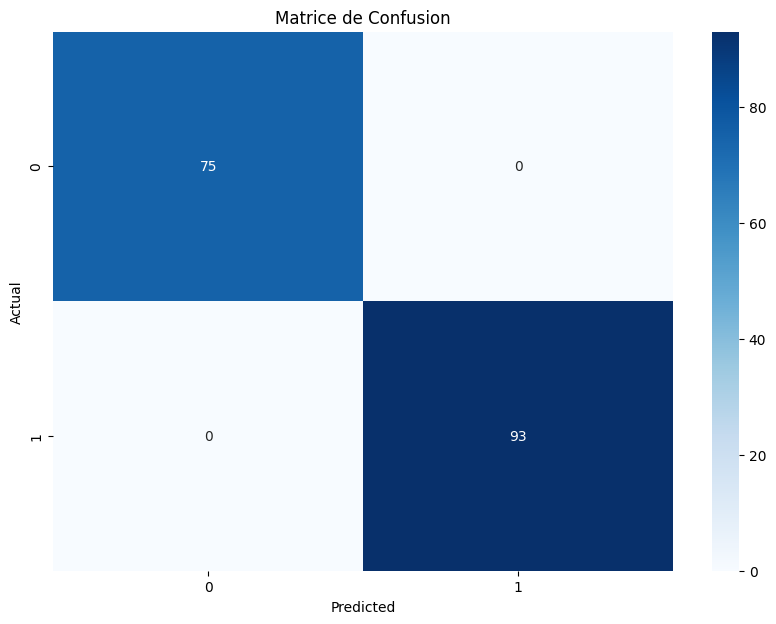

In [ ]:
# Matrice de confusion pour l'ensemble d'entraînment 

# Prédiction sur l'ensemble d'entraînement
y_train_pred = rf_model.predict(X_train)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion')
plt.show()

#### Amélioration des hyperparamètres du random forest 

In [ ]:
# Définir les hyperparamètres à tester

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Validation croisée à 5 plis
                           n_jobs=-1,  # Utiliser tous les cœurs disponibles
                           verbose=2)

In [ ]:
# Exécuter GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print(f"Best parameters found: {grid_search.best_params_}")

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.627906976744186


#### Lazy predict pour faire une classification des clauses selon leur interprétabilité ou non 

In [ ]:
import lazypredict 
from lazypredict.Supervised import LazyClassifier
import random

In [ ]:
# Fixer la graine aléatoire
np.random.seed(42)
random.seed(42)

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 31/31 [00:02<00:00, 13.50it/s]

[LightGBM] [Info] Number of positive: 88, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15381
[LightGBM] [Info] Number of data points in the train set: 476, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184874 -> initscore=-1.483669
[LightGBM] [Info] Start training from score -1.483669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.82               0.64     0.64      0.80   
LabelSpreading                     0.82               0.64     0.64      0.80   
AdaBoostClassifier                 0.79               0.62     0.62      0.78   
NearestCentroid                    0.49               0.62     0.62      0.53   
XGBClassifier                      0.83               0.61     0.61      0.80   
LGBMClassifier                     0.83               0.60     0.60      0.80   
GaussianNB                         0.35               0.60     0.60      0.34   
KNeighborsClassifier               0.82               0.59     0.59      0.79   
ExtraTreeClassifier                0.77               0.59     0.59      0.76   
BernoulliNB                        0.54               0.58     0.58      0.59   
LinearDiscriminantAnalysis  

## ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialiser le modèle
etc = ExtraTreesClassifier(random_state=42)

# Entraîner le modèle
etc.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = etc.predict(X_test)

# Évaluation des performances
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        97
           1       0.50      0.04      0.08        23

    accuracy                           0.81       120
   macro avg       0.66      0.52      0.49       120
weighted avg       0.75      0.81      0.74       120

[[96  1]
 [22  1]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entraîner GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres : ", best_params)

# Utiliser le modèle avec les meilleurs hyperparamètres
best_etc = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs hyperparamètres :  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prédictions sur l'ensemble de test avec le modèle affiné
y_pred_best = best_etc.predict(X_test)

# Évaluation des performances
print(classification_report(y_test, y_pred_best))

# Calculer les probabilités prédites pour l'ensemble de test
y_pred_proba = best_etc.predict_proba(X_test)[:, 1]

# Calculer l'AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Afficher l'AUC
print(f"AUC: {auc:.2f}")

              precision    recall  f1-score   support

           0       0.93      0.56      0.70        25
           1       0.61      0.94      0.74        18

    accuracy                           0.72        43
   macro avg       0.77      0.75      0.72        43
weighted avg       0.80      0.72      0.72        43

AUC: 0.79


#### Matrice de confusion pour l'ExtraTreesClassifier

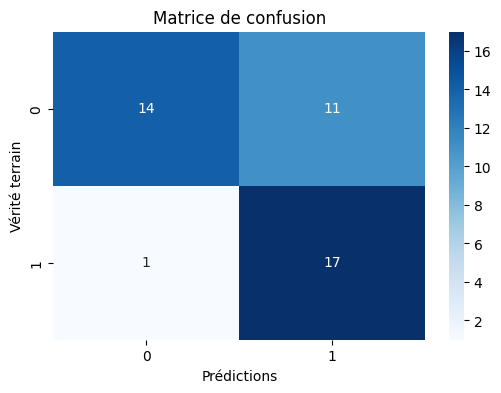

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prédictions sur l'ensemble de test avec le modèle affiné
y_pred_best = best_etc.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_best)

# Affichage de la matrice de confusion avec des couleurs
plt.figure(figsize=(6, 4))  # Ajustez la taille de la figure ici
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

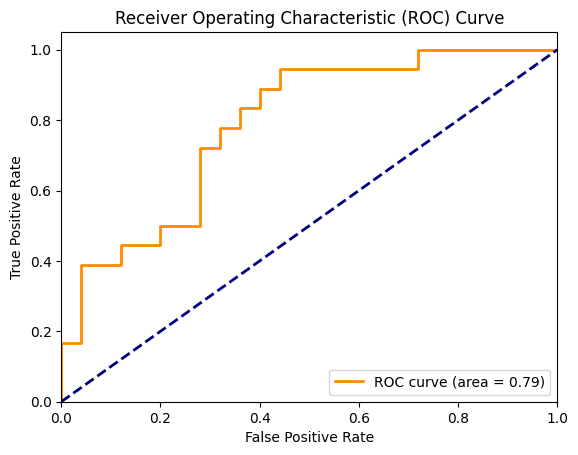

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités prédites pour l'ensemble de test
y_pred_proba = best_etc.predict_proba(X_test)[:, 1]

# Calculer les courbes ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### La courbe de ROC est en escalier du fait du manque de données dans l'ensemble test 

##### On constate que le XGBClassifier a de meilleures performances que le Random Forest  . Nous allons donc implémenter un XGBClassifier et optimiser ses hyperparamètres.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

In [ ]:
import xgboost as xgb

In [ ]:
# Construction du modèle 

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy :.2f}")

Accuracy: 0.67


In [ ]:
# Définir les hyperparamètres à tester

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

#### Recherche des meilleurs hyperparamètres et courbe roc AUC (pour Gradient Boosting)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Accuracy: 0.72
F1 Score: 0.74
ROC AUC Score: 0.79


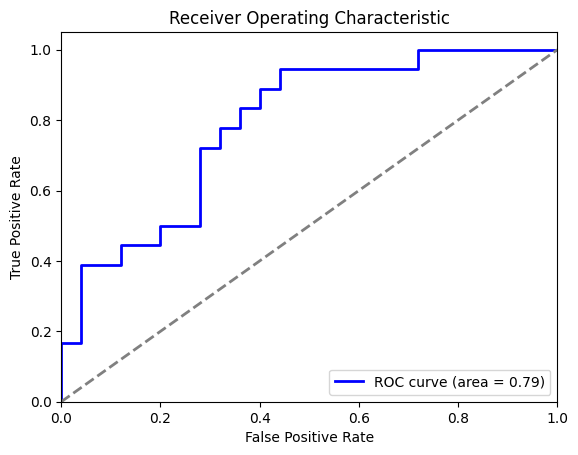

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score

# Afficher les meilleurs paramètres trouvés par GridSearch
print(f"Best parameters found: {grid_search.best_params_}")

# Obtenir le meilleur modèle
best_model = grid_search.best_estimator_

# Faire des prédictions sur le jeu de test
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Accuracy: {accuracy:.2f}")

# Calculer le F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Calculer le ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Implémentation du Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1] 

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.2f}")

Accuracy: 74.42%
AUC: 0.81
